In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
zip_path = tf.keras.utils.get_file(origin="https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip", fname="jena_climate_2009_2016.csv.zip", extract=True)

In [3]:
filename_csv = ".".join(zip_path.split(".")[:-1])
df = pd.read_csv(filename_csv)

In [4]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


Convert from 10 mins to hour intervals

In [5]:
df = df[5::6]
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [6]:
date_time = pd.to_datetime(df.pop("Date Time"))

In [7]:
date_time

5        2009-01-01 01:00:00
11       2009-01-01 02:00:00
17       2009-01-01 03:00:00
23       2009-01-01 04:00:00
29       2009-01-01 05:00:00
                 ...        
420521   2016-12-31 19:10:00
420527   2016-12-31 20:10:00
420533   2016-12-31 21:10:00
420539   2016-12-31 22:10:00
420545   2016-12-31 23:10:00
Name: Date Time, Length: 70091, dtype: datetime64[ns]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

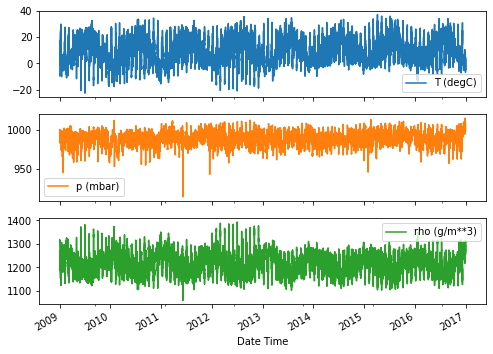

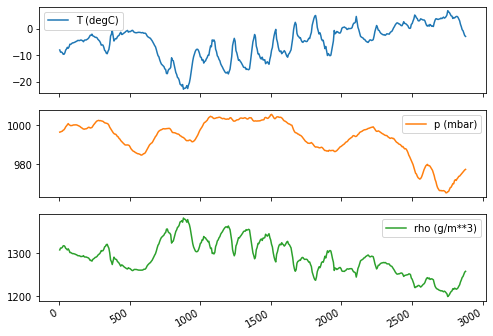

In [8]:
plot_features = df[['T (degC)', 'p (mbar)', 'rho (g/m**3)']]
plot_features.index = date_time
plot_features.plot(subplots=True)

plot_features = df[['T (degC)', 'p (mbar)', 'rho (g/m**3)']][:480]
# plot_features.index = date_time[:480]
plot_features.plot(subplots=True)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [10]:
df["wv (m/s)"][df["wv (m/s)"] == -9999.0] = 0.0
df["max. wv (m/s)"][df["max. wv (m/s)"] == -9999.0] = 0.0
# df[df["p (mbar)"]==0] = 913

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


Wind

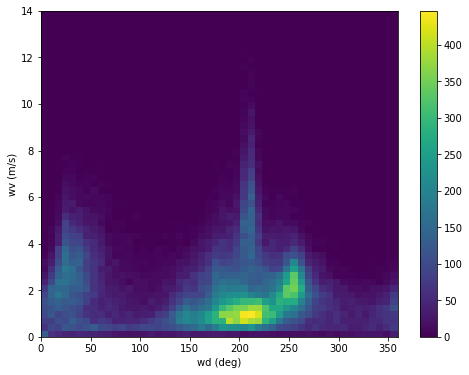

In [11]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50,50))
plt.xlabel('wd (deg)')
plt.ylabel('wv (m/s)')
plt.colorbar()

In [12]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

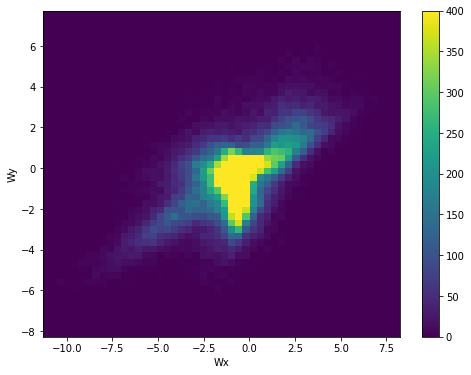

In [13]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50,50), vmax=400)
plt.xlabel('Wx')
plt.ylabel('Wy')
plt.colorbar()

# ax=plt.gca()
# ax.axis('tight')

Time

In [14]:
timestamp_s = date_time.map(datetime.datetime.timestamp)
timestamp_s

5         1.230790e+09
11        1.230793e+09
17        1.230797e+09
23        1.230800e+09
29        1.230804e+09
              ...     
420521    1.483229e+09
420527    1.483233e+09
420533    1.483237e+09
420539    1.483240e+09
420545    1.483244e+09
Name: Date Time, Length: 70091, dtype: float64

C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\tf23\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


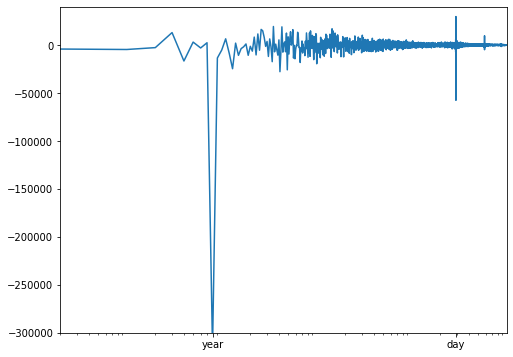

In [15]:
fft = tf.signal.rfft(df['T (degC)'])
plt.xscale("log")
plt.xlim([0.2, 10000])
plt.ylim([-300000, 40000])
plt.xticks([365*8, 8], ['day', 'year'])
plt.plot(fft)

([<matplotlib.axis.XTick at 0x21d53ca57c8>,
 [Text(1, 0, '1/Year'), Text(365, 0, '1/Day')])

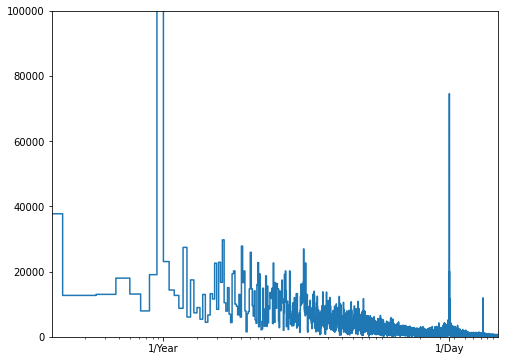

In [16]:
years_per_dataset = len(df) / (24*365)
f_per_year = np.arange(0, len(fft)) / years_per_dataset

plt.step(f_per_year, np.abs(fft))
plt.xscale("log")
plt.xlim(0.1, 1000)
plt.ylim(0, 100000)
plt.xticks([1,365], ['1/Year', '1/Day'])

In [17]:
day = 24*60*60
year = 365.2425 * day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

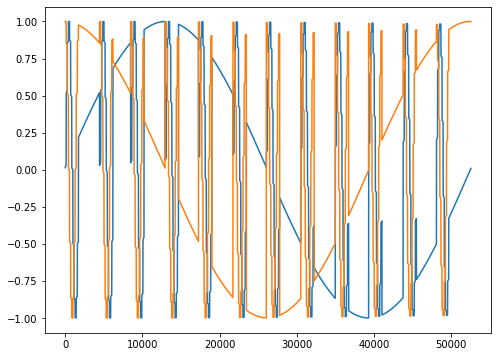

In [18]:
plt.plot(df['Year sin'][:24*365])
plt.plot(df['Year cos'][:24*365])


In [19]:
columns_indicies = {name: i for i, name in enumerate(df.columns)}
num_features = df.shape[1]
columns_indicies

{'p (mbar)': 0,
 'T (degC)': 1,
 'Tpot (K)': 2,
 'Tdew (degC)': 3,
 'rh (%)': 4,
 'VPmax (mbar)': 5,
 'VPact (mbar)': 6,
 'VPdef (mbar)': 7,
 'sh (g/kg)': 8,
 'H2OC (mmol/mol)': 9,
 'rho (g/m**3)': 10,
 'Wx': 11,
 'Wy': 12,
 'max Wx': 13,
 'max Wy': 14,
 'Day sin': 15,
 'Day cos': 16,
 'Year sin': 17,
 'Year cos': 18}

In [20]:
train_df = df[:int(len(df)*0.7)]
valid_df = df[int(len(df)*0.7):int(len(df)*0.9)]
test_df = df[int(len(df)*0.9):]

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
valid_df = (valid_df - train_mean) / train_std
test_df  = ( test_df - train_mean) / train_std


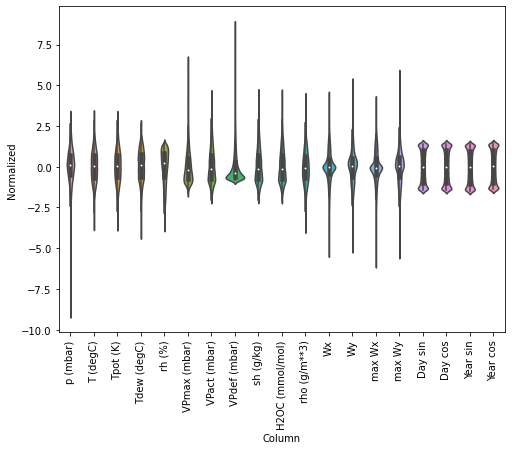

In [21]:
df_normalized = (df - train_mean) / train_std
df_normalized = df_normalized.melt(var_name='Column', value_name='Normalized')

ax = sns.violinplot(data=df_normalized, x="Column", y="Normalized")
# ax.ylim([-100, 100])
_ = ax.set_xticklabels(df.keys(), rotation = 90)

In [22]:
"qwertyuiop"[slice(0,10,2)]

'qetuo'

Windowing

In [23]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=valid_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [24]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24, label_columns=['T (degC)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']

In [25]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=2, label_columns=['T (degC)', 'p (mbar)'])
w2

Total window size: 8
Input indices: [0 1 2 3 4 5]
Label indices: [7]
Label column name(s): ['T (degC)', 'p (mbar)']

In [26]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [27]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])
example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 8, 19)
Inputs shape: (3, 6, 19)
labels shape: (3, 1, 2)


In [28]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

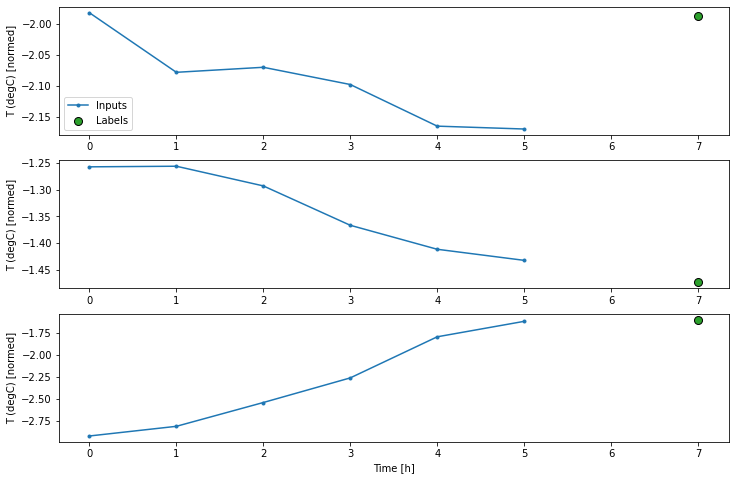

In [29]:
w2.example = example_inputs, example_labels
w2.plot()

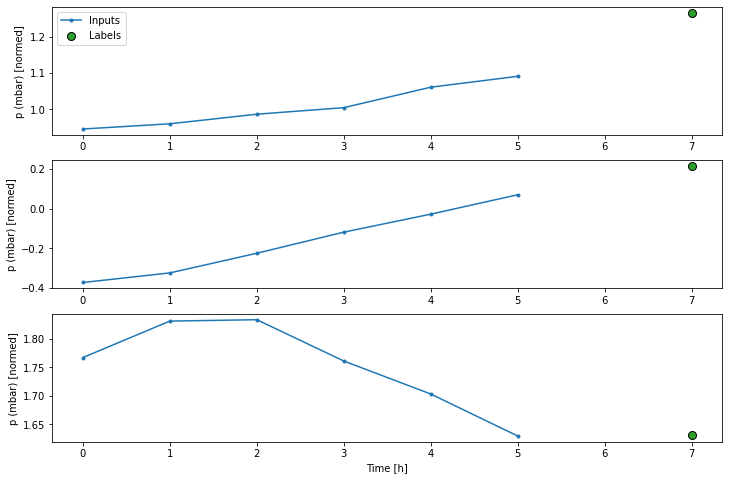

In [30]:
w2.plot(plot_col="p (mbar)")

--- Make dataset

In [31]:
window_len = 10
label_len = 2
def ___split(arr):
    
    return arr[:, slice(0, window_len - label_len)], arr[:, slice(window_len - label_len, window_len)]

data = np.arange(30)
input_data = data[:-11]
dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    input_data, None, sequence_length=10, batch_size=3)
dataset = dataset.map(___split)

print(dataset.element_spec)

for batch in dataset:
    features, labels = batch
    print(f"--- features ",features,f"\n--- labels\n {labels}\n")


(TensorSpec(shape=(None, None), dtype=tf.int32, name=None), TensorSpec(shape=(None, None), dtype=tf.int32, name=None))
--- features  tf.Tensor(
[[0 1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7 8]
 [2 3 4 5 6 7 8 9]], shape=(3, 8), dtype=int32) 
--- labels
 [[ 8  9]
 [ 9 10]
 [10 11]]

--- features  tf.Tensor(
[[ 3  4  5  6  7  8  9 10]
 [ 4  5  6  7  8  9 10 11]
 [ 5  6  7  8  9 10 11 12]], shape=(3, 8), dtype=int32) 
--- labels
 [[11 12]
 [12 13]
 [13 14]]

--- features  tf.Tensor(
[[ 6  7  8  9 10 11 12 13]
 [ 7  8  9 10 11 12 13 14]
 [ 8  9 10 11 12 13 14 15]], shape=(3, 8), dtype=int32) 
--- labels
 [[14 15]
 [15 16]
 [16 17]]

--- features  tf.Tensor([[ 9 10 11 12 13 14 15 16]], shape=(1, 8), dtype=int32) 
--- labels
 [[17 18]]



In [32]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [33]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [34]:
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 2), dtype=tf.float32, name=None))

In [35]:
for (features, labels) in w2.train.take(2):
    print(features.shape)
    print(labels.shape)
#     print(features[:, :, 0].shape)

(32, 6, 19)
(32, 1, 2)
(32, 6, 19)
(32, 1, 2)


========== Modeling

In [36]:
single_step_window = WindowGenerator(input_width=1, label_width=1, shift=1, label_columns=['T (degC)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [37]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        
        return result[:, :, tf.newaxis]
    
baseline = Baseline(columns_indicies['T (degC)'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.MeanAbsoluteError()])


val_performance = {}
performance = {}

val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test)

performance

220/220 [==============================] - 0s 1ms/step - loss: 0.0142 - mean_absolute_error: 0.0852


{'Baseline': [0.014162620529532433, 0.08516012132167816]}

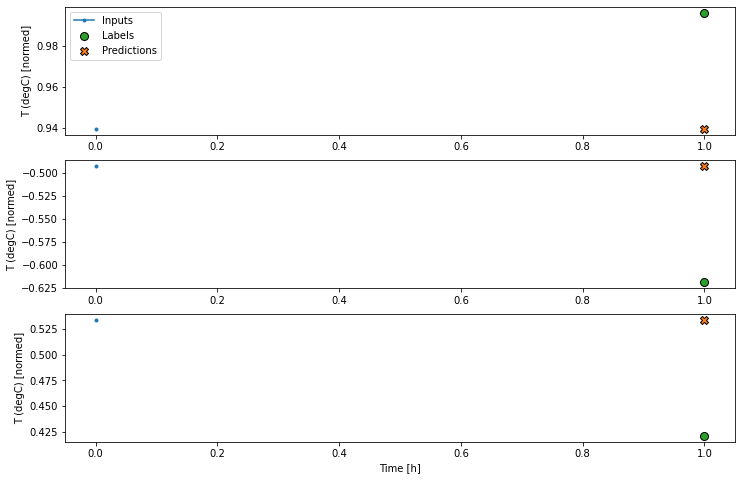

In [38]:
single_step_window.plot(baseline)

In [39]:
wide_window = WindowGenerator(input_width = 24, label_width=24, shift=1, label_columns=['T (degC)'])
wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

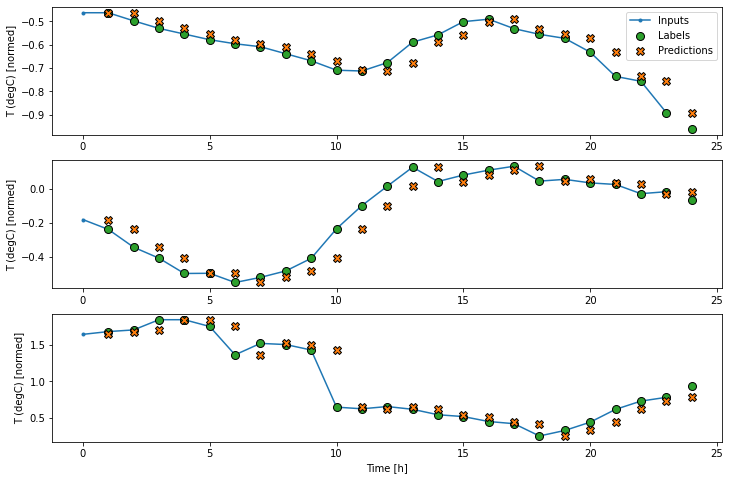

In [40]:
wide_window.plot(baseline)

In [41]:
baseline.evaluate(wide_window.val)

438/438 [==============================] - 1s 2ms/step - loss: 0.0129 - mean_absolute_error: 0.0785


[0.012853365391492844, 0.07849811017513275]

In [42]:
def compile_and_fit(model, window, patience=5):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=patience, verbose=1, restore_best_weights=True, mode='min')
    
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer="adam", metrics=[tf.keras.metrics.MeanAbsoluteError()])
    history = model.fit(window.train, epochs=30, validation_data=window.val, callbacks=[early_stopping])
    
    return history

In [43]:
linear = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 1),
])

history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test)


Epoch 1/30
1534/1534 [==============================] - 3s 2ms/step - loss: 0.1765 - mean_absolute_error: 0.2610 - val_loss: 0.0158 - val_mean_absolute_error: 0.0888
Epoch 2/30
1534/1534 [==============================] - 3s 2ms/step - loss: 0.0109 - mean_absolute_error: 0.0762 - val_loss: 0.0092 - val_mean_absolute_error: 0.0708
Epoch 3/30
1534/1534 [==============================] - 3s 2ms/step - loss: 0.0094 - mean_absolute_error: 0.0712 - val_loss: 0.0090 - val_mean_absolute_error: 0.0696
Epoch 4/30
1534/1534 [==============================] - 3s 2ms/step - loss: 0.0093 - mean_absolute_error: 0.0708 - val_loss: 0.0089 - val_mean_absolute_error: 0.0691
Epoch 5/30
1534/1534 [==============================] - 3s 2ms/step - loss: 0.0093 - mean_absolute_error: 0.0706 - val_loss: 0.0089 - val_mean_absolute_error: 0.0687
Epoch 6/30
1534/1534 [==============================] - 3s 2ms/step - loss: 0.0093 - mean_absolute_error: 0.0704 - val_loss: 0.0088 - val_mean_absolute_error: 0.0681
Epoc

In [44]:
performance

{'Baseline': [0.014162620529532433, 0.08516012132167816],
 'Linear': [0.008554304018616676, 0.06638944894075394]}

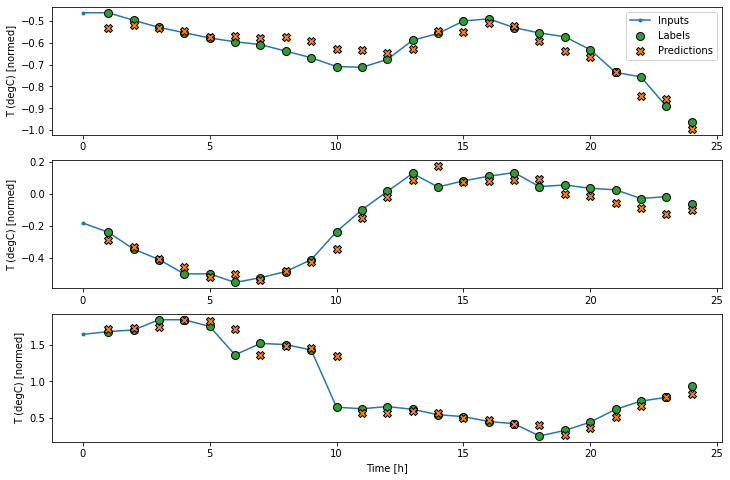

In [45]:
wide_window.plot(linear)

[Text(0, 0, 'p (mbar)'),
 Text(1, 0, 'T (degC)'),
 Text(2, 0, 'Tpot (K)'),
 Text(3, 0, 'Tdew (degC)'),
 Text(4, 0, 'rh (%)'),
 Text(5, 0, 'VPmax (mbar)'),
 Text(6, 0, 'VPact (mbar)'),
 Text(7, 0, 'VPdef (mbar)'),
 Text(8, 0, 'sh (g/kg)'),
 Text(9, 0, 'H2OC (mmol/mol)'),
 Text(10, 0, 'rho (g/m**3)'),
 Text(11, 0, 'Wx'),
 Text(12, 0, 'Wy'),
 Text(13, 0, 'max Wx'),
 Text(14, 0, 'max Wy'),
 Text(15, 0, 'Day sin'),
 Text(16, 0, 'Day cos'),
 Text(17, 0, 'Year sin'),
 Text(18, 0, 'Year cos')]

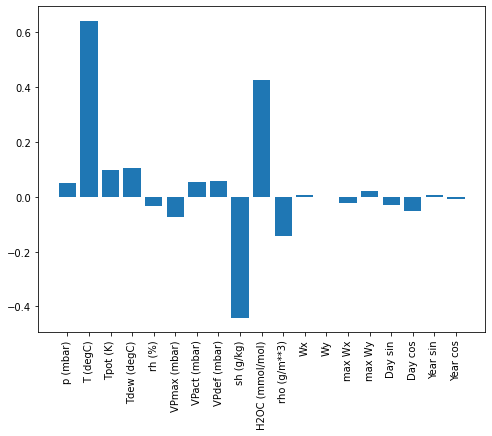

In [46]:
plt.bar(x=np.arange(0, linear.layers[0].kernel.shape[0]), height = tf.squeeze(linear.layers[0].kernel))
plt.xticks(np.arange(linear.layers[0].kernel.shape[0]))
axa = plt.gca()
axa.set_xticklabels(train_df.columns, rotation=90)

In [47]:
dense = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1),
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test)

val_performance

Epoch 1/30
1534/1534 [==============================] - 4s 2ms/step - loss: 0.0135 - mean_absolute_error: 0.0782 - val_loss: 0.0084 - val_mean_absolute_error: 0.0662
Epoch 2/30
1534/1534 [==============================] - 4s 2ms/step - loss: 0.0081 - mean_absolute_error: 0.0652 - val_loss: 0.0082 - val_mean_absolute_error: 0.0669
Epoch 3/30
1534/1534 [==============================] - 4s 2ms/step - loss: 0.0078 - mean_absolute_error: 0.0635 - val_loss: 0.0078 - val_mean_absolute_error: 0.0638
Epoch 4/30
1534/1534 [==============================] - 4s 2ms/step - loss: 0.0075 - mean_absolute_error: 0.0622 - val_loss: 0.0083 - val_mean_absolute_error: 0.0673
Epoch 5/30
1534/1534 [==============================] - 4s 2ms/step - loss: 0.0075 - mean_absolute_error: 0.0617 - val_loss: 0.0080 - val_mean_absolute_error: 0.0647
Epoch 6/30
1534/1534 [==============================] - 4s 2ms/step - loss: 0.0074 - mean_absolute_error: 0.0616 - val_loss: 0.0076 - val_mean_absolute_error: 0.0632
Epoc

{'Baseline': [0.012845641933381557, 0.07846630364656448],
 'Linear': [0.00874445028603077, 0.06797946244478226],
 'Dense': [0.007012307643890381, 0.059011414647102356]}

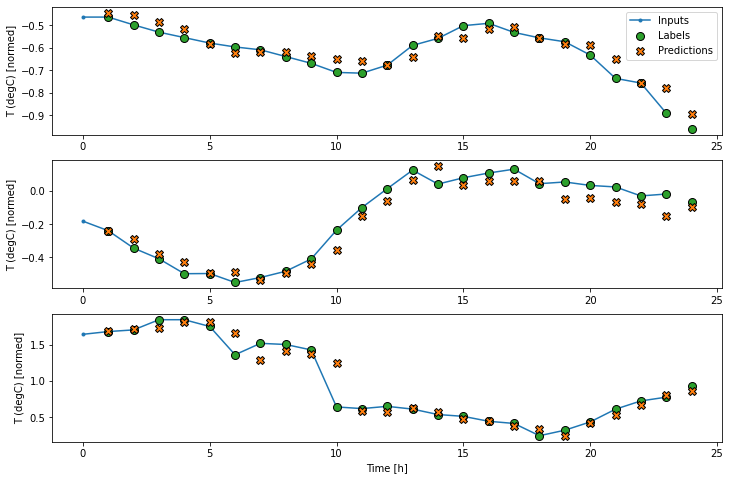

In [48]:
wide_window.plot(dense)

In [60]:
multi_step_dense = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Reshape([1, -1]),
])

multi_step_dense_window = WindowGenerator(input_width=6, label_width=1, shift=1, label_columns=['T (degC)'])

history = compile_and_fit(multi_step_dense, multi_step_dense_window)

val_performance["Multi step dense"] = multi_step_dense.evaluate(multi_step_dense_window.val)
performance["Multi step dense"] = multi_step_dense.evaluate(multi_step_dense_window.test)


Epoch 1/30
1534/1534 [==============================] - 2s 2ms/step - loss: 0.0175 - mean_absolute_error: 0.0927 - val_loss: 0.0101 - val_mean_absolute_error: 0.0727
Epoch 2/30
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0090 - mean_absolute_error: 0.0699 - val_loss: 0.0081 - val_mean_absolute_error: 0.0669
Epoch 3/30
1534/1534 [==============================] - 2s 2ms/step - loss: 0.0083 - mean_absolute_error: 0.0660 - val_loss: 0.0121 - val_mean_absolute_error: 0.0836
Epoch 4/30
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0077 - mean_absolute_error: 0.0633 - val_loss: 0.0068 - val_mean_absolute_error: 0.0581
Epoch 5/30
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0076 - mean_absolute_error: 0.0624 - val_loss: 0.0073 - val_mean_absolute_error: 0.0617
Epoch 6/30
1534/1534 [==============================] - 2s 2ms/step - loss: 0.0073 - mean_absolute_error: 0.0614 - val_loss: 0.0121 - val_mean_absolute_error: 0.0845
Epoc

In [50]:
val_performance

{'Baseline': [0.012845641933381557, 0.07846630364656448],
 'Linear': [0.00874445028603077, 0.06797946244478226],
 'Dense': [0.007012307643890381, 0.059011414647102356],
 'Multi step dense': [0.006559739820659161, 0.05707962065935135]}

In [51]:
conv_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation="relu"),
    tf.keras.layers.Conv1D(32, kernel_size=3, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1),
])

history = compile_and_fit(conv_model, multi_step_dense_window)

val_performance["Conv"] = multi_step_dense.evaluate(multi_step_dense_window.val)
performance["Conv"] = multi_step_dense.evaluate(multi_step_dense_window.test)


Epoch 1/30
1534/1534 [==============================] - 6s 4ms/step - loss: 0.0270 - mean_absolute_error: 0.1125 - val_loss: 0.0151 - val_mean_absolute_error: 0.0882
Epoch 2/30
1534/1534 [==============================] - 6s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0867 - val_loss: 0.0130 - val_mean_absolute_error: 0.0820
Epoch 3/30
1534/1534 [==============================] - 7s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0853 - val_loss: 0.0139 - val_mean_absolute_error: 0.0857
Epoch 4/30
1534/1534 [==============================] - 7s 5ms/step - loss: 0.0138 - mean_absolute_error: 0.0838 - val_loss: 0.0133 - val_mean_absolute_error: 0.0828
Epoch 5/30
1534/1534 [==============================] - 7s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0827 - val_loss: 0.0126 - val_mean_absolute_error: 0.0796
Epoch 6/30
1534/1534 [==============================] - 6s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0820 - val_loss: 0.0125 - val_mean_absolute_error: 0.0787
Epoc

In [61]:
multi_step_dense(multi_step_dense_window.example[0]).shape

TensorShape([32, 1, 1])

In [63]:
print("conv labels:", multi_step_dense_window.example[1].shape)
print("conv output:", conv_model(multi_step_dense_window.example[0]).shape)


conv labels: (32, 1, 1)
conv output: (32, 2, 1)


In [68]:
conv_window = WindowGenerator(input_width=24 + (3 - 1)*2, label_width=24, shift=1, label_columns=['T (degC)'])
print("conv label:", conv_window.example[1].shape)
print("conv output:", conv_model(conv_window.example[0]).shape)


conv label: (32, 24, 1)
conv output: (32, 24, 1)


In [70]:
history = compile_and_fit(conv_model, conv_window)

val_performance["Conv long windows"] = conv_model.evaluate(conv_window.val)
performance["Conv long window"] = conv_model.evaluate(conv_window.test)

val_performance

Epoch 1/30
1533/1533 [==============================] - 6s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0508 - val_loss: 0.0063 - val_mean_absolute_error: 0.0556
Epoch 2/30
1533/1533 [==============================] - 5s 3ms/step - loss: 0.0052 - mean_absolute_error: 0.0502 - val_loss: 0.0062 - val_mean_absolute_error: 0.0542
Epoch 3/30
1533/1533 [==============================] - 6s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0498 - val_loss: 0.0064 - val_mean_absolute_error: 0.0549
Epoch 4/30
1533/1533 [==============================] - 6s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0495 - val_loss: 0.0065 - val_mean_absolute_error: 0.0553
Epoch 5/30
1533/1533 [==============================] - 6s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0491 - val_loss: 0.0065 - val_mean_absolute_error: 0.0553
Epoch 6/30
1533/1533 [==============================] - 6s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0488 - val_loss: 0.0065 - val_mean_absolute_error: 0.0558
Epoc

{'Baseline': [0.012845641933381557, 0.07846630364656448],
 'Linear': [0.00874445028603077, 0.06797946244478226],
 'Dense': [0.007012307643890381, 0.059011414647102356],
 'Multi step dense': [0.006322791799902916, 0.055449534207582474],
 'Conv': [0.0065597426146268845, 0.057079631835222244],
 'Conv long windows': [0.006200152449309826, 0.054217223078012466]}

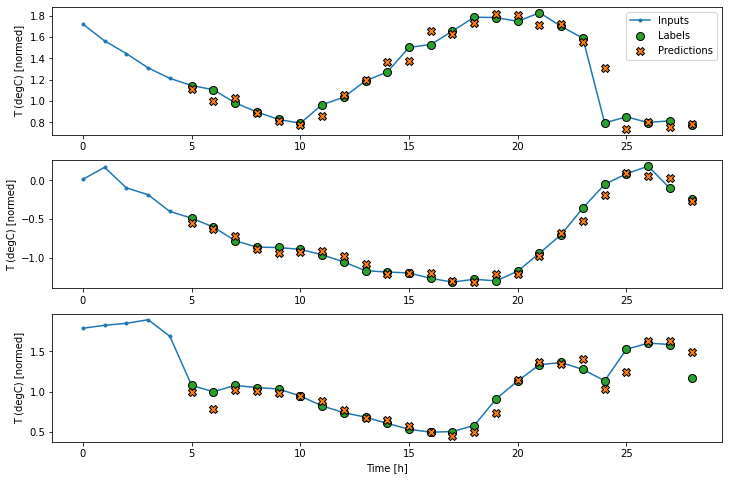

In [71]:
conv_window.plot(conv_model)

LSTM model

In [85]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(1),
])

history = compile_and_fit(lstm_model, wide_window)

val_performance["LSTM"] = lstm_model.evaluate(wide_window.val)
performance["LSTM"] = lstm_model.evaluate(wide_window.test)


Epoch 1/30
1533/1533 [==============================] - 11s 7ms/step - loss: 0.0199 - mean_absolute_error: 0.0854 - val_loss: 0.0068 - val_mean_absolute_error: 0.0583
Epoch 2/30
1533/1533 [==============================] - 11s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0566 - val_loss: 0.0062 - val_mean_absolute_error: 0.0548
Epoch 3/30
1533/1533 [==============================] - 11s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0545 - val_loss: 0.0061 - val_mean_absolute_error: 0.0542
Epoch 4/30
1533/1533 [==============================] - 10s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0535 - val_loss: 0.0060 - val_mean_absolute_error: 0.0539
Epoch 5/30
1533/1533 [==============================] - 10s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0527 - val_loss: 0.0060 - val_mean_absolute_error: 0.0536
Epoch 6/30
1533/1533 [==============================] - 10s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0523 - val_loss: 0.0059 - val_mean_absolute_error: 0.052

In [86]:
print("label shape:", wide_window.example[1].shape)
print("prediction shape:", lstm_model(wide_window.example[0]).shape)


label shape: (32, 24, 1)
prediction shape: (32, 24, 1)


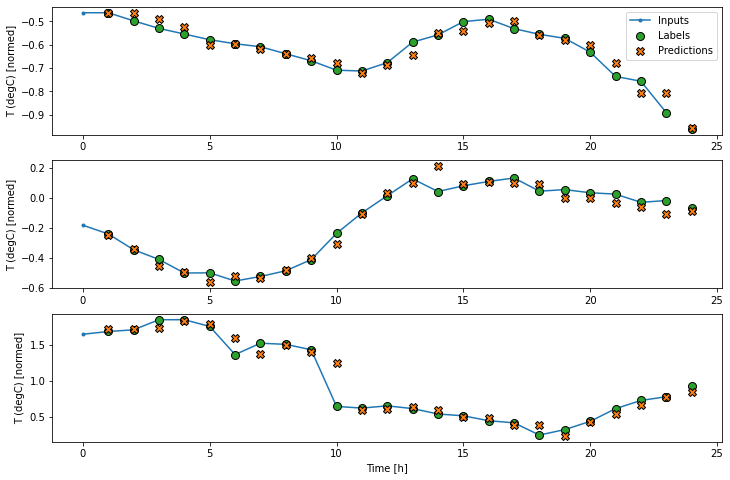

In [87]:
wide_window.plot(lstm_model)

Performance

([<matplotlib.axis.XTick at 0x21d7404a108>,
 [Text(0, 0, 'Baseline'),
  Text(1, 0, 'Linear'),
  Text(2, 0, 'Dense'),
  Text(3, 0, 'Multi step dense'),
  Text(4, 0, 'Conv'),
  Text(5, 0, 'Conv long windows'),
  Text(6, 0, 'LSTM')])

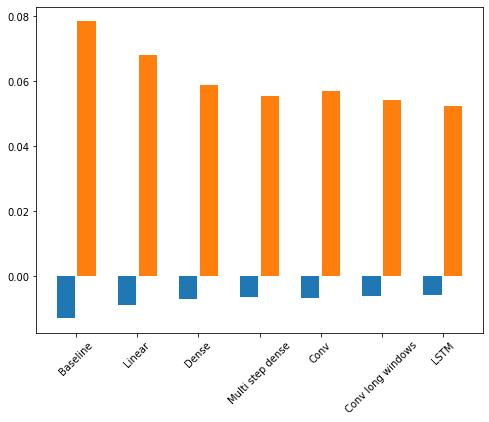

In [116]:
x = np.arange(len(val_performance))
___bars0 = [ -val_performance[item][0] for item in val_performance]
___bars1 = [ val_performance[item][1] for item in val_performance]
plt.bar(x = x-0.17 , height= ___bars0,width=0.3)
plt.bar(x = x+0.17 , height= ___bars1,width=0.3)
plt.xticks(ticks = x, labels=val_performance.keys(), rotation=45)

In [208]:
class ResidualWrapper(tf.keras.Model):
    def __init__(self, model):
        super().__init__()
        self.model = model
        
    def call(self, inputs, *args, **kwargs):
        print("inputs shape:", inputs.shape)
        model_out = self.model(inputs, *args, **kwargs)
        print("model out shape:", model_out.shape)
        final_out = inputs + model_out
        print("after summary shape:", final_out.shape)
        return final_out
    
residual_lstm = ResidualWrapper(tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(19),
]))



In [209]:
# residual_window = WindowGenerator(input_width=24, label_width=24, shift=1, label_columns=['T (degC)'])
residual_window = WindowGenerator(input_width=24, label_width=24, shift=1)
residual_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): None

In [210]:
residual_lstm(residual_window.example[0]).shape
print("label shape:", residual_window.example[1].shape)

inputs shape: (32, 24, 19)
model out shape: (32, 24, 19)
after summary shape: (32, 24, 19)
label shape: (32, 24, 19)


In [211]:
history = compile_and_fit(residual_lstm, residual_window)

Epoch 1/30
inputs shape: (None, 24, 19)
model out shape: (None, 24, 19)
after summary shape: (None, 24, 19)
inputs shape: (None, 24, 19)
model out shape: (None, 24, 19)
after summary shape: (None, 24, 19)
1530/1533 [============================>.] - ETA: 0s - loss: 0.0708 - mean_absolute_error: 0.1345inputs shape: (None, 24, 19)
model out shape: (None, 24, 19)
after summary shape: (None, 24, 19)
1533/1533 [==============================] - 11s 7ms/step - loss: 0.0708 - mean_absolute_error: 0.1345 - val_loss: 0.0650 - val_mean_absolute_error: 0.1247
Epoch 2/30
1533/1533 [==============================] - 11s 7ms/step - loss: 0.0642 - mean_absolute_error: 0.1225 - val_loss: 0.0635 - val_mean_absolute_error: 0.1216
Epoch 3/30
1533/1533 [==============================] - 11s 7ms/step - loss: 0.0629 - mean_absolute_error: 0.1200 - val_loss: 0.0631 - val_mean_absolute_error: 0.1204
Epoch 4/30
1533/1533 [==============================] - 12s 8ms/step - loss: 0.0622 - mean_absolute_error: 0.11

In [212]:
residual_lstm.evaluate(residual_window.val)

438/438 [==============================] - 1s 3ms/step - loss: 0.0629 - mean_absolute_error: 0.1197


[0.06286042928695679, 0.11971699446439743]

In [213]:
val_performance

{'Baseline': [0.012845641933381557, 0.07846630364656448],
 'Linear': [0.00874445028603077, 0.06797946244478226],
 'Dense': [0.007012307643890381, 0.059011414647102356],
 'Multi step dense': [0.006322791799902916, 0.055449534207582474],
 'Conv': [0.0065597426146268845, 0.057079631835222244],
 'Conv long windows': [0.006200152449309826, 0.054217223078012466],
 'LSTM': [0.005868652835488319, 0.05250805988907814]}

Feedback

In [242]:
num_features = 1

class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.units = units
        self.out_steps = out_steps
        self.lstm_cell = tf.keras.layers.LSTMCell(self.units)
        self.lstm_rnn = tf.keras.layers.RNN(tf.keras.layers.LSTMCell(self.units), return_state=True)
        self.dense = tf.keras.layers.Dense(num_features)

    def warmup(self, features):
        x, *state = self.lstm_rnn(features)
        result = self.dense(x)
        return result, state
    
    def call(self, x, training=None):
        ta = tf.TensorArray(tf.float32, size=0, dynamic_size=True)
        x, state = self.warmup(x)
        ta = ta.write(0, x)

        for idx in tf.range(1, self.out_steps):
            x, state = self.lstm_cell(x, states=state, training=training)
            x = self.dense(x)
            ta = ta.write(idx, x)
        
        ta = ta.stack()
        ta = tf.transpose(ta, [1,0,2])
        return ta
        
    
feedback_model = FeedBack(units=32, out_steps=24)
temp_result = feedback_model(wide_window.example[0])
print("input shape:", wide_window.example[0].shape)
print("label shape:", wide_window.example[1].shape)
print("predict shape:", temp_result.shape)

input shape: (32, 24, 19)
label shape: (32, 24, 1)
predict shape: (32, 24, 1)


In [244]:
history = compile_and_fit(feedback_model, wide_window)

Epoch 1/30
1533/1533 [==============================] - 36s 23ms/step - loss: 0.0520 - mean_absolute_error: 0.1483 - val_loss: 0.0136 - val_mean_absolute_error: 0.0877
Epoch 2/30
1533/1533 [==============================] - 35s 23ms/step - loss: 0.0112 - mean_absolute_error: 0.0793 - val_loss: 0.0091 - val_mean_absolute_error: 0.0708
Epoch 3/30
1533/1533 [==============================] - 37s 24ms/step - loss: 0.0082 - mean_absolute_error: 0.0673 - val_loss: 0.0074 - val_mean_absolute_error: 0.0633
Epoch 4/30
1533/1533 [==============================] - 35s 23ms/step - loss: 0.0071 - mean_absolute_error: 0.0622 - val_loss: 0.0069 - val_mean_absolute_error: 0.0611
Epoch 5/30
1533/1533 [==============================] - 35s 23ms/step - loss: 0.0064 - mean_absolute_error: 0.0590 - val_loss: 0.0059 - val_mean_absolute_error: 0.0562
Epoch 6/30
1533/1533 [==============================] - 35s 23ms/step - loss: 0.0053 - mean_absolute_error: 0.0532 - val_loss: 0.0048 - val_mean_absolute_error:

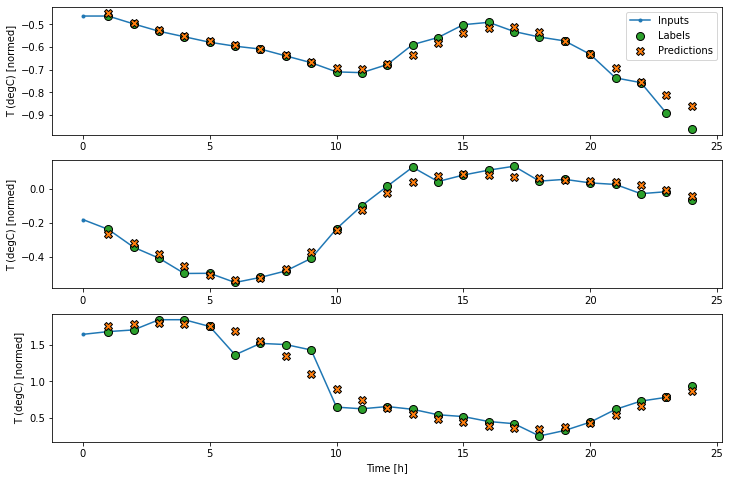

In [245]:
wide_window.plot(feedback_model)

In [247]:
val_performance['Feedback'] = feedback_model.evaluate(wide_window.val)

438/438 [==============================] - 3s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0324


([<matplotlib.axis.XTick at 0x21d0274bd48>,
 [Text(0, 0, 'Baseline'),
  Text(1, 0, 'Linear'),
  Text(2, 0, 'Dense'),
  Text(3, 0, 'Multi step dense'),
  Text(4, 0, 'Conv'),
  Text(5, 0, 'Conv long windows'),
  Text(6, 0, 'LSTM'),
  Text(7, 0, 'Feedback')])

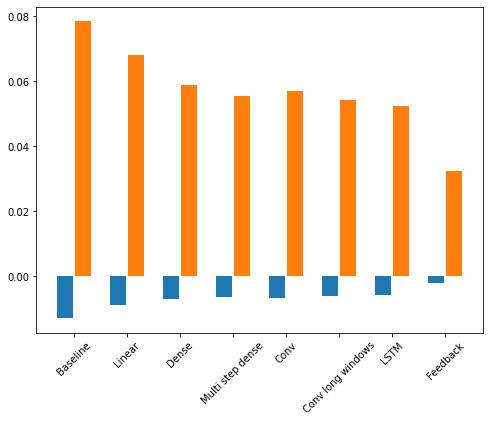

In [248]:
x = np.arange(len(val_performance))
___bars0 = [ -val_performance[item][0] for item in val_performance]
___bars1 = [ val_performance[item][1] for item in val_performance]
plt.bar(x = x-0.17 , height= ___bars0,width=0.3)
plt.bar(x = x+0.17 , height= ___bars1,width=0.3)
plt.xticks(ticks = x, labels=val_performance.keys(), rotation=45)